In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [6]:
#warnings.filterwarnings("ignore")

In [7]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
series.tail()

,Passengers
Month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


In [9]:
def check_stationary (series):
    """
    This function checks the stationarity of a time series using the Augmented Dickey-Fuller test.
    
    Args:
        series: A Pandas Series object containing the time series data.
    
    Returns:
        None
    """
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('\t%s: %.3f' % (key, value))



In [10]:
check_stationary (series)

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
	10%: -2.579


In [11]:
def make_stationary (series):
    """
    This function makes a time series stationary by differencing it and dropping the missing values.
    
    Args:
        series: A Pandas Series object containing the time series data.
    
    Returns:
        A Pandas Series object containing the stationary time series data.
    """
    stationary_series = series.diff().dropna()
    return stationary_series


In [12]:
stationary_series = make_stationary (series)
check_stationary (stationary_series)


ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
	10%: -2.579


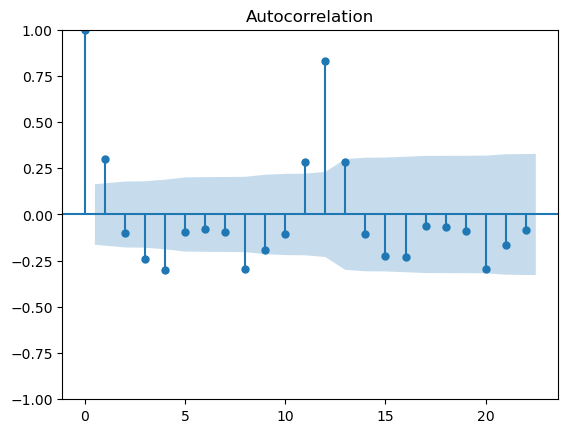

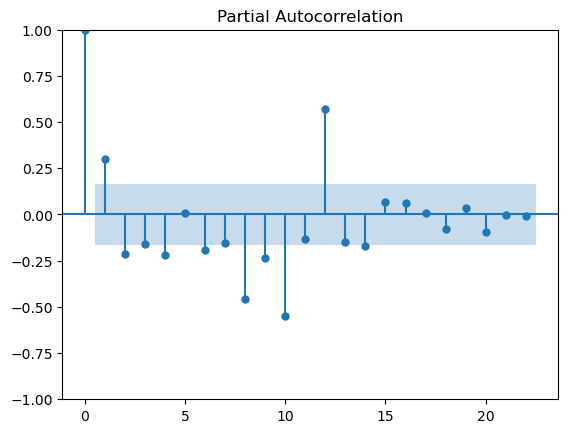

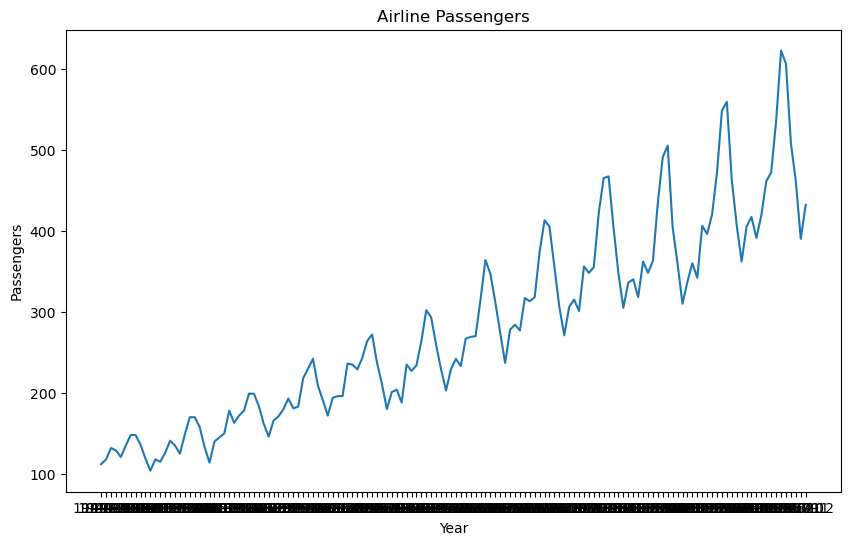

In [13]:
plot_acf(stationary_series)
plot_pacf(stationary_series)
plt.show()
#Plot the original time series:
plt.figure(figsize=(10, 6))
plt.plot(series.index, series ["Passengers"])
plt.title("Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()
